In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Le problème est celui d'accrocher un élastique entre deux point A et B séparés par un obstacle.
On se donne comme forme de l'obstacle la fonction suivante:
$$f: \ x \mapsto \ -16 ( (x - 0.25)(x - 0.75))^2 + 0.5 $$

On va résoudre ce problème de minimisation sous contrainte (l'élastique doit être au-dessus de l'obstacle) avec deux méthodes:
1. Méthode du gradient projeté.
2. Méthode du gradient pénalisé.

In [2]:
random.seed(0)

In [3]:
def obstacle(x):
    return -16*((x-0.25)*(x-0.75))**2 + 0.5

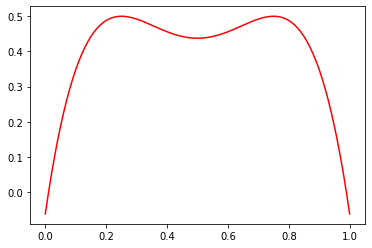

In [4]:
N = 100
xx = linspace(0, 1, N + 1)
plot(xx, obstacle(xx), 'r')

In [5]:
def A(n):
    e = ones(n)
    ee = ones (n-1)
    return 2 * diag(e) - diag(ee, -1) - diag(ee, 1)

In [6]:
A(10)

array([[ 2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [-1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2., -1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -1.,  2.]])

Le problème revient à minimier $J(u) = <Au,u>$ où $u_n$ serait la hauteur de l'élastique en $x_n$.

## Gradient projeté

In [7]:
def Pi(u):
    n = len(u)
    xx = linspace(0, 1, n)
    v = obstacle(xx)
    s = 0.5*(abs(u-v)+u+v)
    s[0] = 0
    s[-1] = 0
    return s

In [8]:
u0 =0.5 * ones(N+1)
u0[0]=0
u0[-1] = 0

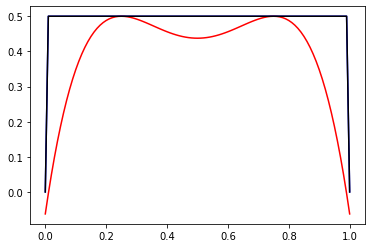

In [9]:
plot(xx, obstacle(xx),'r',xx, u0,'b',xx,Pi(u0),'k' )

In [10]:
mat = A(N+1)
L = max(abs(eig(mat)[0]))
l = min(abs(eig(mat)[0]))
alpha = 1 / (L+l)
print(alpha)

0.2500000000000001


In [11]:
#alpha = 0.001
err = 1
niter = 0
u = u0.copy()
while err > 10**(-5):
    v = u - 2 * alpha * dot(mat,u)
    v[0] = 0
    v[-1] = 0
    v = Pi(v)
    err = norm (v-u)
    u = v
    niter += 1

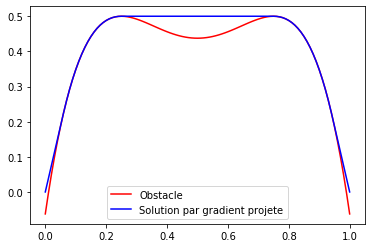

In [12]:
plot(xx, obstacle(xx),'r', label = 'Obstacle')
plot(xx, u,'b', label = 'Solution par gradient projete' )
legend(loc = 'lower center')
show()

In [13]:
def gradproj(u0, alpha, err_max):
    n = len(u0)
    err = 1
    niter = 0
    u = u0.copy()
    while err > err_max:
        v = u - 2 * alpha * dot(A(n),u)
        v[0] = 0
        v[-1] = 0
        v = Pi(v)
        err = norm (v-u)
        u = v
        niter += 1
    return niter, u

In [14]:
err_max = [10**(-i) for i in range(15)]
niter_proj = []
for i in range(15):
    iter, u = gradproj(u0, alpha, err_max[i])
    niter_proj.append(iter)

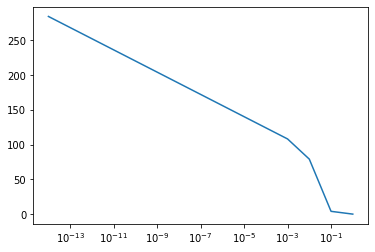

In [16]:
semilogx(err_max, niter_proj)

## Gradient pénalisé

In [17]:
def grad_pen(u):
    n = len(u)
    xx = linspace(0, 1, n)
    v = obstacle(xx)
    s = (abs(v - u) + v - u)
    return s

In [18]:
u0 = 0.5 * ones(N+1)
u0[0]=0
u0[-1] = 0

In [19]:
err = 1
niter = 0
pen = 0.001
u = u0.copy()
while err > 10**(-3):
    v = u - 2 * alpha * ( dot(mat,u) - pen * grad_pen(u))
    v[0] = 0
    v[-1] = 0
    v = Pi(v)
    err = norm (v-u)
    u = v
    niter += 1

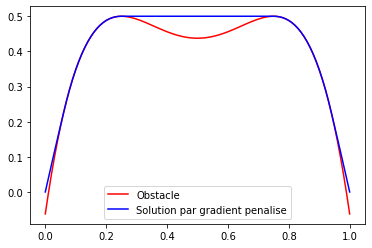

In [20]:
plot(xx, obstacle(xx),'r', label = 'Obstacle')
plot(xx, u,'b', label = 'Solution par gradient penalise' )
legend(loc = 'lower center')
show()

In [21]:
def gradpen(u0, alpha, err_max):
    n = len(u0)
    err = 1
    niter = 0
    u = u0.copy()
    while err > err_max:
        v = u - 2 * alpha * (dot(A(n),u) - pen * grad_pen(u))
        v[0] = 0
        v[-1] = 0
        v = Pi(v)
        err = norm (v-u)
        u = v
        niter += 1
    return niter, u

In [22]:
err_max = [10**(-i) for i in range(15)]
niter_pen = []
for i in range(15):
    iter, u = gradpen(u0, alpha, err_max[i])
    niter_pen.append(iter)

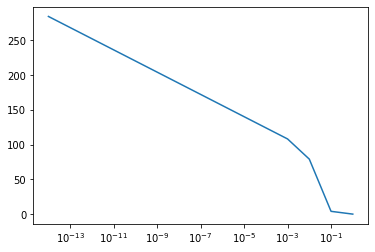

In [23]:
semilogx(err_max, niter_pen)

## Comparaison des deux méthodes

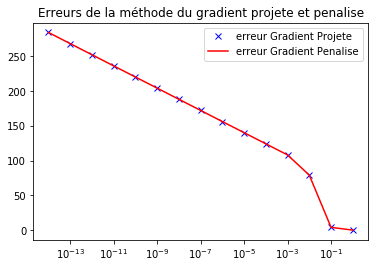

In [24]:
semilogx(err_max, niter_proj, 'bx', label = "erreur Gradient Projete")
semilogx(err_max, niter_pen, 'r', label = "erreur Gradient Penalise")
title("Erreurs de la méthode du gradient projete et penalise")  
legend(loc = 'upper right')
show()

In [25]:
import time 

In [26]:
err_max = [10**(-i) for i in range(15)]
temps_pen = []
temps_proj = []
for i in range(15):
    start_pen = time.time()
    gradpen(u0, alpha, err_max[i])
    end_pen = time.time()
    temps_pen.append(end_pen - start_pen)
    start_proj = time.time()
    gradproj(u0, alpha, err_max[i])
    end_proj = time.time()
    temps_proj.append(end_proj  - start_proj)

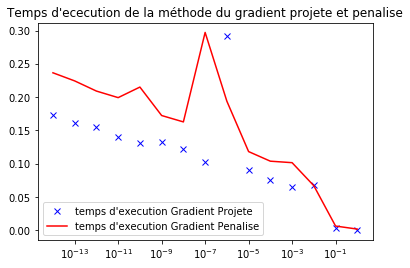

In [27]:
semilogx(err_max, temps_proj, 'bx', label = "temps d'execution Gradient Projete")
semilogx(err_max, temps_pen, 'r', label = "temps d'execution Gradient Penalise")
title("Temps d'ececution de la méthode du gradient projete et penalise")  
legend(loc = 'lower left')
show()